# Sentiment Analysis Usin NLP

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/emotion-detection-from-text/tweet_emotions.csv


## Loading Data

In [2]:
df = pd.read_csv('/kaggle/input/emotion-detection-from-text/tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [3]:
df.shape

(40000, 3)

## Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [5]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [8]:
# dropping tweet id
df.drop('tweet_id', axis=1, inplace=True)

In [9]:
df['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

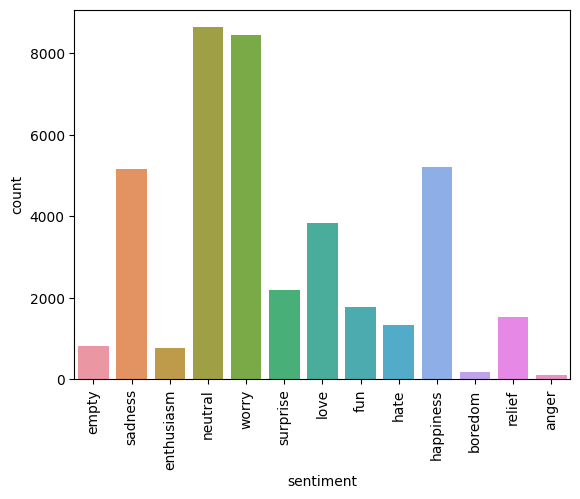

In [10]:
sns.countplot(x=df['sentiment'])
plt.xticks(rotation=90)
plt.show()

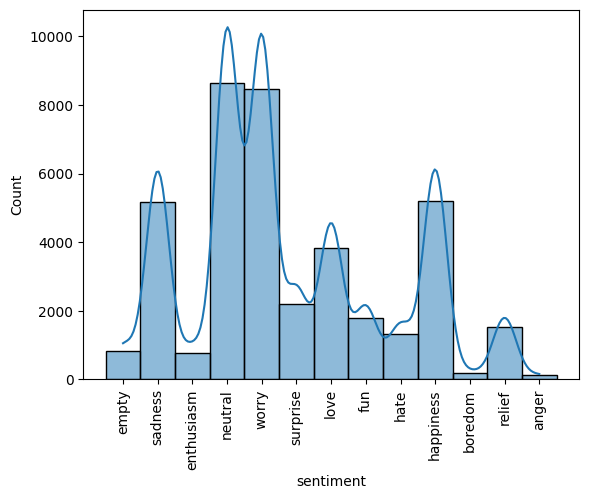

In [11]:
sns.histplot(x=df['sentiment'], kde=True)
plt.xticks(rotation=90)
plt.show()

## Preprocessing

In [12]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [13]:
def clean(text):
    text = text.lower()
    text = re.sub('[^\w\s]', '', text)
    text = [word for word in text.split() if word not in stop_words]
    text = [stemmer.stem(w) for w in text]
    return text

In [14]:
df['text'] = df['content'].apply(lambda x: clean(x))
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [15]:
df.head()

,sentiment,content,text
0,empty,@tiffanylue i know i was listenin to bad habi...,tiffanylu know listenin bad habit earlier star...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhhwaitin call
2,sadness,Funeral ceremony...gloomy friday...,funer ceremonygloomi friday
3,enthusiasm,wants to hang out with friends SOON!,want hang friend soon
4,neutral,@dannycastillo We want to trade with someone w...,dannycastillo want trade someon houston ticket...


## Word Cloud

In [16]:
all_words = ' '.join(word for word in df['text'])

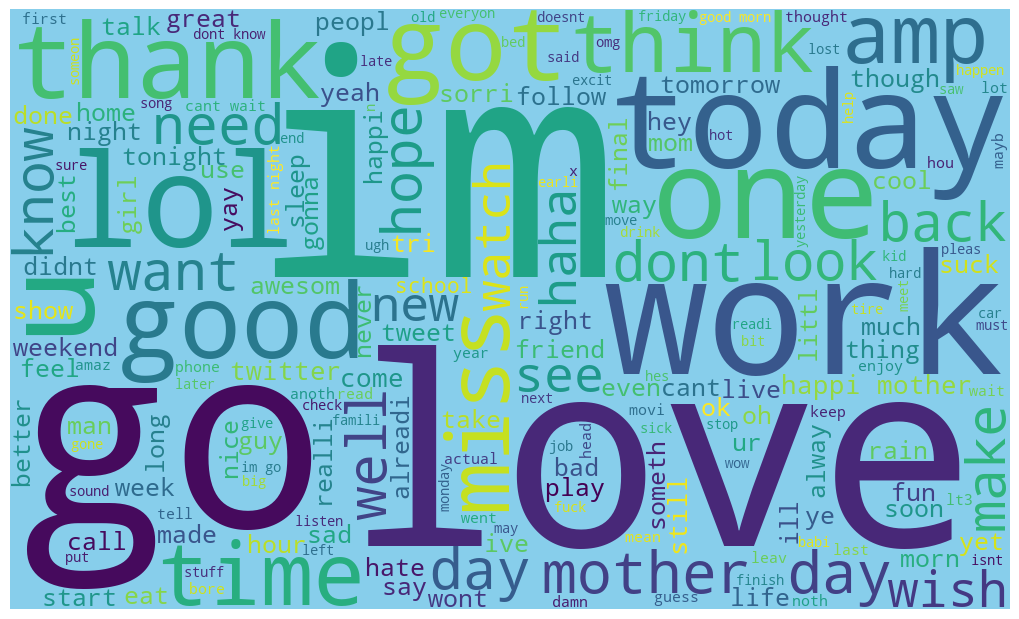

In [17]:
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'skyblue',
    min_font_size = 10).generate(all_words)
plt.figure(figsize = (10, 6), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## Building The Model

In [18]:
X = np.array(df['text'])
y = np.array(df['sentiment'])

In [19]:
le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
vec = TfidfVectorizer()
X = vec.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

## Naive Bayes

In [22]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [23]:
nb_pred = nb.predict(X_test)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       163
           4       0.00      0.00      0.00       338
           5       0.40      0.11      0.17      1028
           6       0.00      0.00      0.00       268
           7       0.59      0.13      0.21       762
           8       0.31      0.45      0.37      1740
           9       0.00      0.00      0.00       352
          10       0.35      0.01      0.01      1046
          11       0.00      0.00      0.00       425
          12       0.26      0.78      0.39      1666

    accuracy                           0.29      8000
   macro avg       0.15      0.11      0.09      8000
weighted avg       0.27      0.29      0.20      8000



## Logistic Regression

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
lr_pred = lr.predict(X_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       163
           4       0.12      0.01      0.02       338
           5       0.33      0.33      0.33      1028
           6       0.52      0.13      0.20       268
           7       0.51      0.38      0.44       762
           8       0.33      0.60      0.43      1740
           9       0.35      0.02      0.03       352
          10       0.37      0.24      0.29      1046
          11       0.33      0.03      0.06       425
          12       0.33      0.48      0.39      1666

    accuracy                           0.35      8000
   macro avg       0.25      0.17      0.17      8000
weighted avg       0.34      0.35      0.31      8000



## Random Forest

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       163
           4       0.11      0.02      0.03       338
           5       0.31      0.32      0.31      1028
           6       0.37      0.19      0.25       268
           7       0.44      0.40      0.42       762
           8       0.33      0.56      0.41      1740
           9       0.19      0.01      0.03       352
          10       0.35      0.22      0.27      1046
          11       0.24      0.03      0.05       425
          12       0.32      0.45      0.37      1666

    accuracy                           0.33      8000
   macro avg       0.20      0.17      0.16      8000
weighted avg       0.30      0.33      0.30      8000



## In conclusion we tried 3 different models and the best performing model was Logistic Regression.